### Libraries

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style("whitegrid")

In [3]:
df=pd.read_csv('Dataset_clean_with_Title.csv')

In [4]:
df.head()

,Unnamed: 0,Titre,Editeur,Nombre_de_localisations,Nombre_de_prêt_total,Nombre_de_prêts_2017,Nombre_d'exemplaires,Aimé_Césaire,Amélie,André_Malraux,...,Vaugirard,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
0,0,La Politique étrangère en France | Texte impri...,Documentation française ;Ministère des affaire...,1,7.0,0,1,0.0,0.0,0.0,...,0.0,Unknown,Unknown,Unknown,Other,Book,2003,14,French,Other
1,1,Voyages en Sicile | Texte imprimé | Dominique ...,"Diderot éditeur, arts et sciences",1,16.0,0,1,0.0,0.0,0.0,...,0.0,Dominique Vivant Denon,Unknown,Unknown,Other,Book,1998,19,French,Other
2,2,0Voyages | [2] | Russie | Texte imprimé | Niko...,Plon,2,17.0,1,2,0.0,0.0,0.0,...,0.0,Níkos Kazantzákīs,Liliane Princet,Unknown,Other,Book,1977,40,French,Other
3,3,L'harmonica blues pour débutants | Texte imprimé,Emf,3,205.0,6,3,0.0,0.0,0.0,...,0.0,Mick Kinsella,Unknown,Unknown,Other,Partition,1997,20,French,Other
4,4,A letter to Amy | Texte imprimé | Ezra Jack Keats,Harper Trophy,2,87.0,3,2,0.0,0.0,0.0,...,0.0,Ezra Jack Keats,Unknown,Unknown,Other,Book,1984,33,English,Other


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns

Index(['Titre', 'Editeur', 'Nombre_de_localisations', 'Nombre_de_prêt_total',
       'Nombre_de_prêts_2017', 'Nombre_d'exemplaires', 'Aimé_Césaire',
       'Amélie', 'André_Malraux', 'Andrée_Chedid', 'Arthur_Rimbaud',
       'Assia_Djebar', 'Batignolles', 'Benjamin_Rabier', 'Buffon',
       'Canopée_-_la_fontaine', 'Chaptal', 'Charlotte_Delbo',
       'Claude_Lévi-Strauss', 'Colette_Vivier', 'Courcelles',
       'Couronnes_-_Naguib_Mahfouz', 'Crimée', 'Diderot', 'Drouot',
       'Edmond_Rostand', 'Europe', 'Faidherbe', 'Fessart', 'François_Villon',
       'Françoise_Sagan', 'Georges_Brassens', 'Germaine_Tillion', 'Glacière',
       'Goutte_d'Or', 'Gutenberg', 'Hélène_Berr', 'Hergé', 'Heure_Joyeuse',
       'Italie', 'Jacqueline_de_Romilly', 'Jean-Pierre_Melville', 'Lancry',
       'Louise_Michel', 'Marguerite_Audoux', 'Marguerite_Duras',
       'Marguerite_Yourcenar', 'Maurice_Genevoix', 'MMP', 'Mohammed_Arkoun',
       'Mortier', 'Musset', 'Oscar_Wilde', 'Parmentier', 'Place_des_Fêtes

In [7]:
# change French title to an English version
dct_col={'Titre':'Title', 
             'Editeur':'Initial_publisher', 
             'Nombre_de_localisations':'Number_locations',
             'Nombre_de_prêt_total':'Total_loans',
             'Nombre_de_prêts_2017':'Number_Loans_2017', 
             "Nombre_d'exemplaires":'Total_stock', }

In [8]:
df.columns=df.columns.map(lambda x: x if x not in dct_col.keys() else dct_col[x])

In [34]:
df.to_csv('Dataset_clean_Eng.csv')

In [9]:
todrop=list(df.iloc[:,6:65].columns)

In [10]:
df1=df.drop(todrop,axis=1)

In [11]:
df1.head()

,Title,Initial_publisher,Number_locations,Total_loans,Number_Loans_2017,Total_stock,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
0,La Politique étrangère en France | Texte impri...,Documentation française ;Ministère des affaire...,1,7.0,0,1,Unknown,Unknown,Unknown,Other,Book,2003,14,French,Other
1,Voyages en Sicile | Texte imprimé | Dominique ...,"Diderot éditeur, arts et sciences",1,16.0,0,1,Dominique Vivant Denon,Unknown,Unknown,Other,Book,1998,19,French,Other
2,0Voyages | [2] | Russie | Texte imprimé | Niko...,Plon,2,17.0,1,2,Níkos Kazantzákīs,Liliane Princet,Unknown,Other,Book,1977,40,French,Other
3,L'harmonica blues pour débutants | Texte imprimé,Emf,3,205.0,6,3,Mick Kinsella,Unknown,Unknown,Other,Partition,1997,20,French,Other
4,A letter to Amy | Texte imprimé | Ezra Jack Keats,Harper Trophy,2,87.0,3,2,Ezra Jack Keats,Unknown,Unknown,Other,Book,1984,33,English,Other


### Age distribution

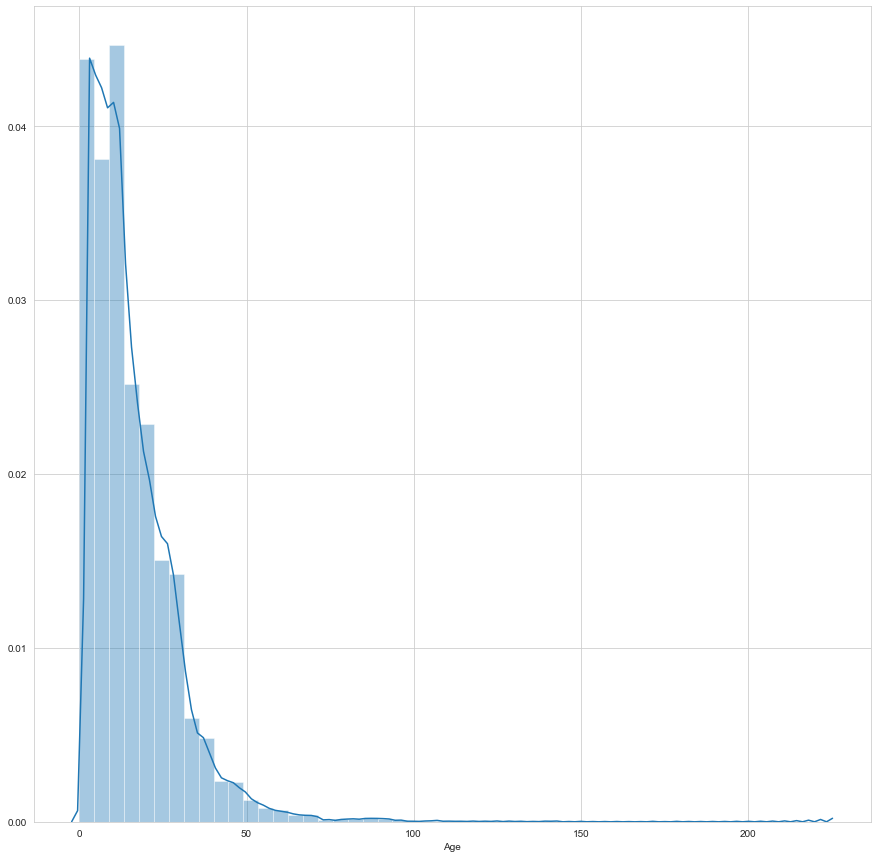

In [15]:
f,axes=plt.subplots(figsize=(15,15))
sns.distplot(df['Age'])
plt.show()


### Doc Type distribution

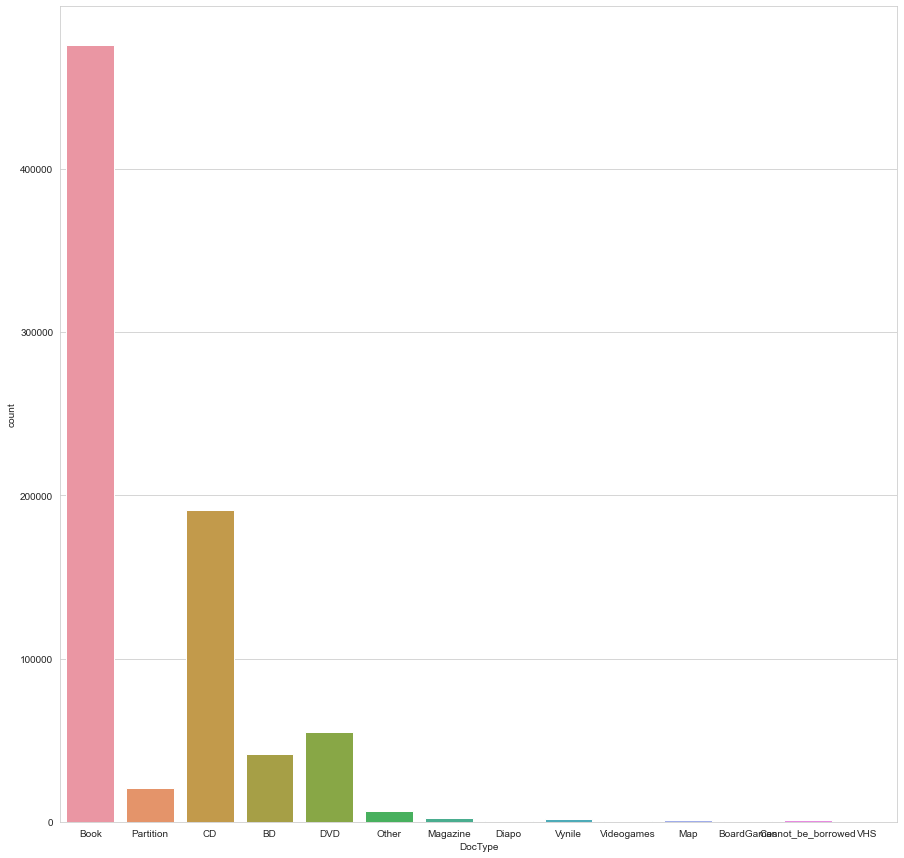

In [16]:
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['DocType'])
plt.show()

### Number of loans 2017 distribution

In [ ]:
#f,axes=plt.subplots(figsize=(15,15))
#sns.countplot(df['Number_Loans_2017'])
#plt.show()



### Language distribution

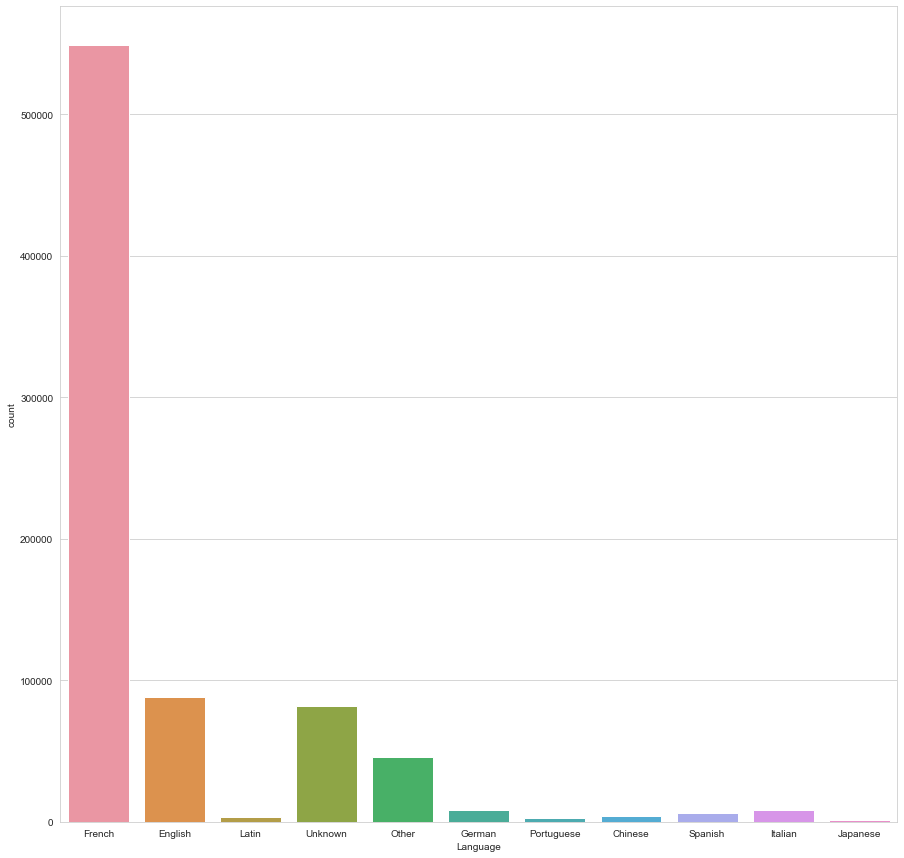

In [17]:

f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Language'])
plt.show()


In [126]:
df[df.Language=='Unknown'].DocType.shape

(82154,)

In [129]:
df.groupby(['DocType','Language'])['Number_Loans_2017'].agg('sum').sort_values(ascending=False)

DocType     Language
Book        French      4458613
BD          French      1925655
DVD         Unknown      636238
            French       486636
CD          English      333600
                         ...   
VHS         French            0
Diapo       Unknown           0
BoardGames  Italian           0
Videogames  Japanese          0
Diapo       German            0
Name: Number_Loans_2017, Length: 113, dtype: int64

In [128]:
df[df.Language=='Unknown'].DocType.value_counts()

CD                    40343
DVD                   19603
Book                  11226
Partition              8333
Other                  1427
Map                     413
Vynile                  348
BD                      230
Videogames               93
Magazine                 79
Cannot_be_borrowed       49
BoardGames                8
Diapo                     2
Name: DocType, dtype: int64

In [133]:
df[df.Language=='French'].DocType.value_counts()

Book                  429222
BD                     40302
CD                     39570
DVD                    26796
Partition               4713
Other                   3390
Magazine                2245
Cannot_be_borrowed       805
Map                      515
Vynile                   438
Diapo                    333
BoardGames               263
Videogames               191
VHS                        5
Name: DocType, dtype: int64

In [134]:
df[df.Language=='English'].DocType.value_counts()
# Surprisingly, most English documents are CD not Books. Same conslusion for Italian.

CD                    59246
Book                  17720
Partition              5140
DVD                    4142
Other                   888
BD                      622
Vynile                  472
Cannot_be_borrowed       67
Map                      37
Videogames               37
Magazine                 32
BoardGames                9
Diapo                     9
Name: DocType, dtype: int64

In [137]:
df[df.Language!='French'].DocType.value_counts()
# While most 'French'documents are Books, most loan document for the other Languages are CDs.

CD                    151413
Book                   46609
DVD                    28130
Partition              16192
Other                   3231
BD                      1524
Vynile                  1023
Map                      674
Videogames               332
Cannot_be_borrowed       209
Magazine                 164
BoardGames                69
Diapo                     28
Name: DocType, dtype: int64

### Publisher distribution

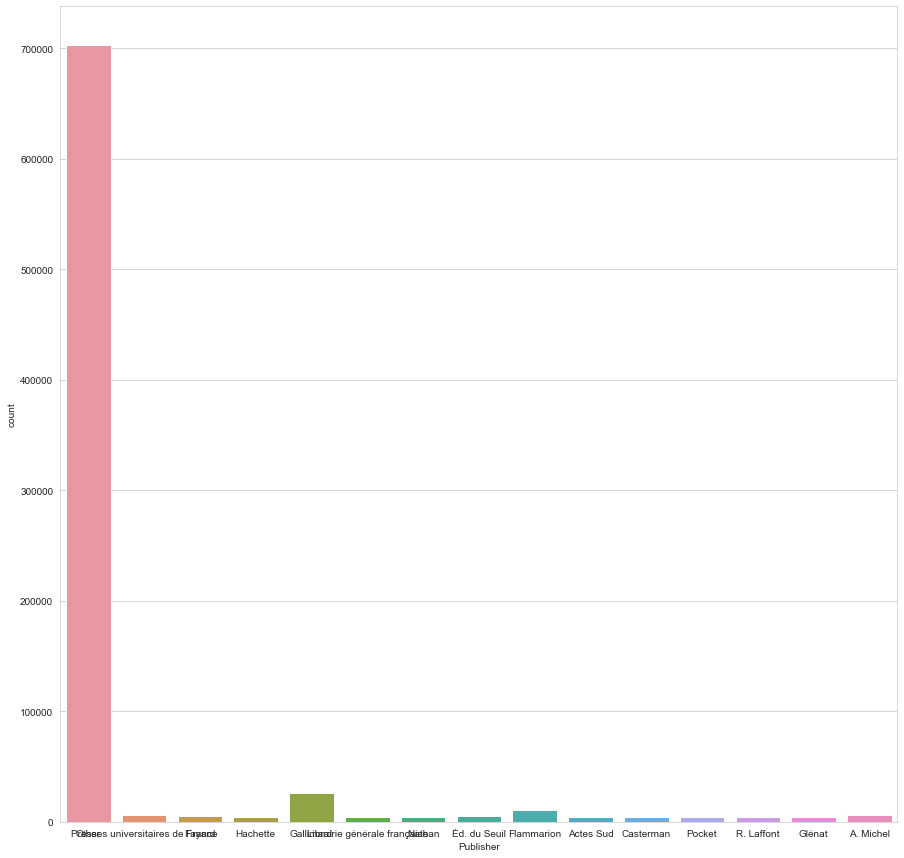

In [18]:
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Publisher'])
plt.show()


### Categories_stat distribution

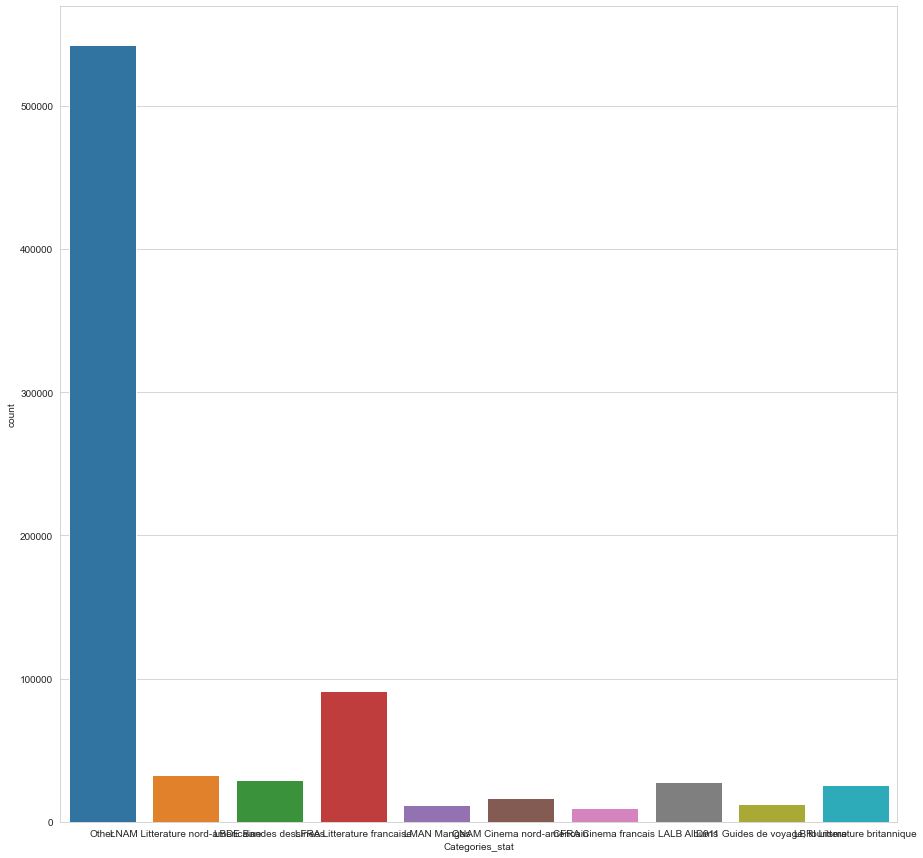

In [24]:
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Categories_stat'])

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='DocType'>

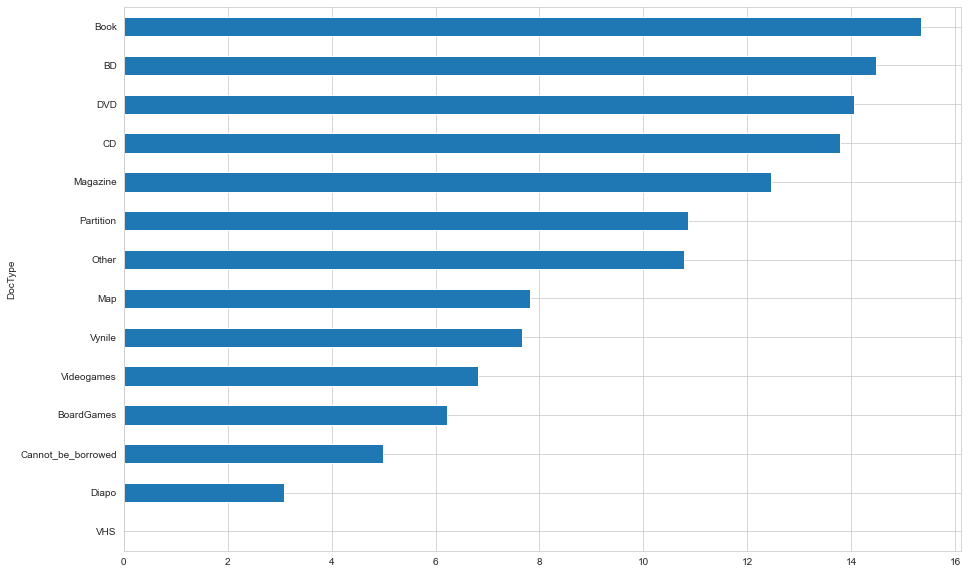

In [60]:
np.log(df.groupby('DocType')['Number_Loans_2017'].agg('sum').sort_values(ascending=True)).plot(kind='barh',figsize=(15,10))

In [52]:
#Function to make the bubble plots
def bubblePlot(col1,func,col2,col3):
    x = np.log(df.groupby(col1).agg(func)[col2])
    y = np.log(df.groupby(col1).agg(func)[col3])
    z = df.groupby(col1).agg(func).index
 
    # use the scatter function
    fig, axs = plt.subplots(figsize=(15,15)) 
    sns.scatterplot(x,y,hue=z,size=z,sizes=(200, 200),)
    plt.show()
    return None


#### Number of loans Vs. stock available by Doctype

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


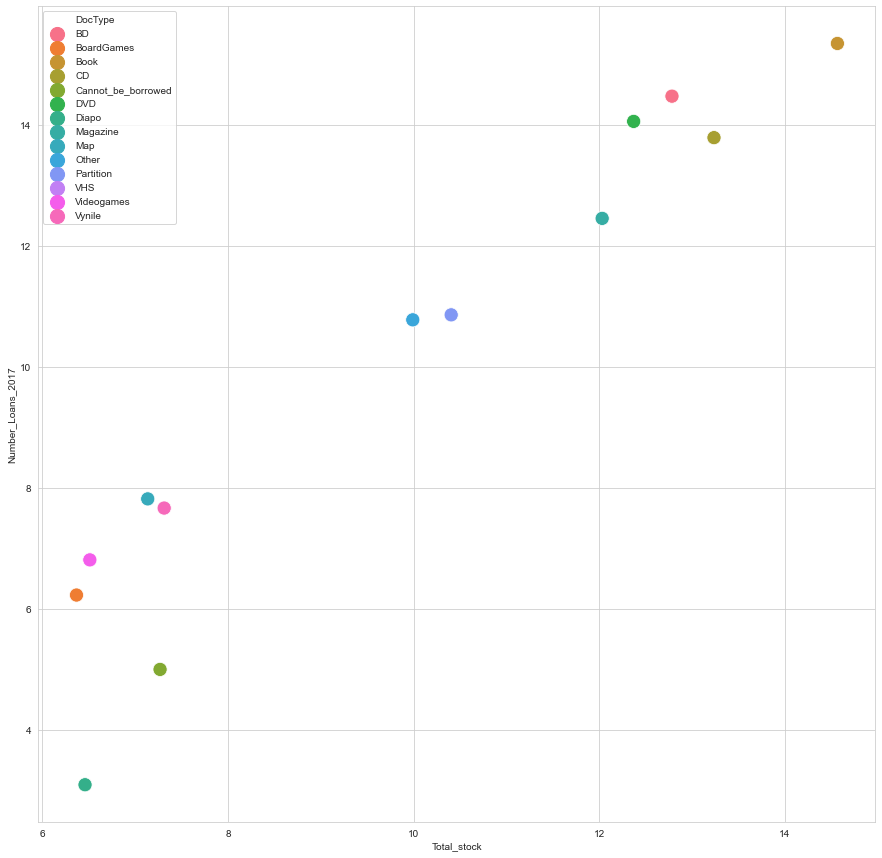

In [53]:
bubblePlot('DocType','sum','Total_stock','Number_Loans_2017')

In [54]:
def loanrate(col1,func,col2,col3):
    dfdoc=df.groupby(col1).agg(func)[[col2,col3]]
    dfdoc['Loan_rate']=np.where(dfdoc[col2]!=0,dfdoc[col3]/dfdoc[col2],0).round(2)
    print(dfdoc.columns)
    dfdoc.sort_values('Loan_rate', axis=0, ascending=False, inplace=True)
    display(dfdoc)
    return None

In [55]:
#Number of loan per number of document in stock per doc type:
loanrate('DocType','sum','Total_stock','Number_Loans_2017')

Index(['Total_stock', 'Number_Loans_2017', 'Loan_rate'], dtype='object')


,Total_stock,Number_Loans_2017,Loan_rate
DocType,,,
BD,355983,1929154,5.42
DVD,235592,1271208,5.40
Other,21804,47847,2.19
Book,2116300,4610334,2.18
Map,1254,2480,1.98
CD,559827,972013,1.74
Partition,32981,51954,1.58
Magazine,167791,255931,1.53
Vynile,1497,2131,1.42


#### Number of loans Vs. stock available by Language

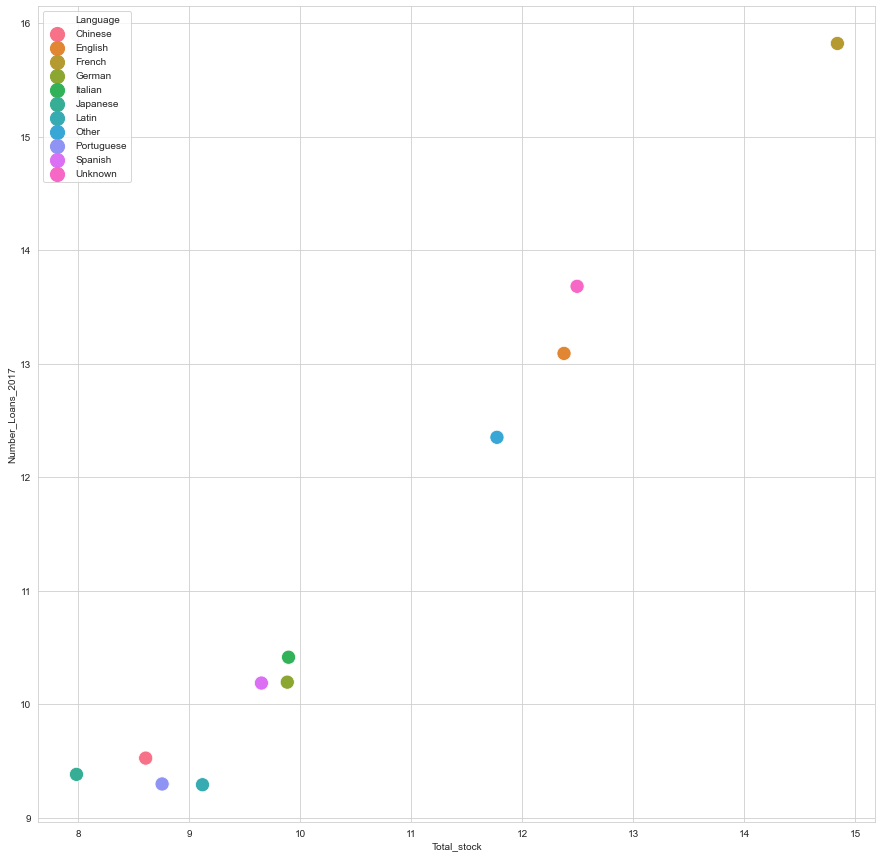

In [56]:
bubblePlot('Language','sum','Total_stock','Number_Loans_2017')

In [57]:
#Number of loan per number of document in stock per doc type:
loanrate('Language','sum','Total_stock','Number_Loans_2017')

Index(['Total_stock', 'Number_Loans_2017', 'Loan_rate'], dtype='object')


,Total_stock,Number_Loans_2017,Loan_rate
Language,,,
Japanese,2936,11863,4.04
Unknown,266787,873922,3.28
French,2783908,7421924,2.67
Chinese,5476,13691,2.50
English,237173,483874,2.04
Other,129622,231080,1.78
Portuguese,6349,10901,1.72
Spanish,15534,26523,1.71
Italian,19831,33299,1.68


#### Number of loans Vs. stock available by Publisher

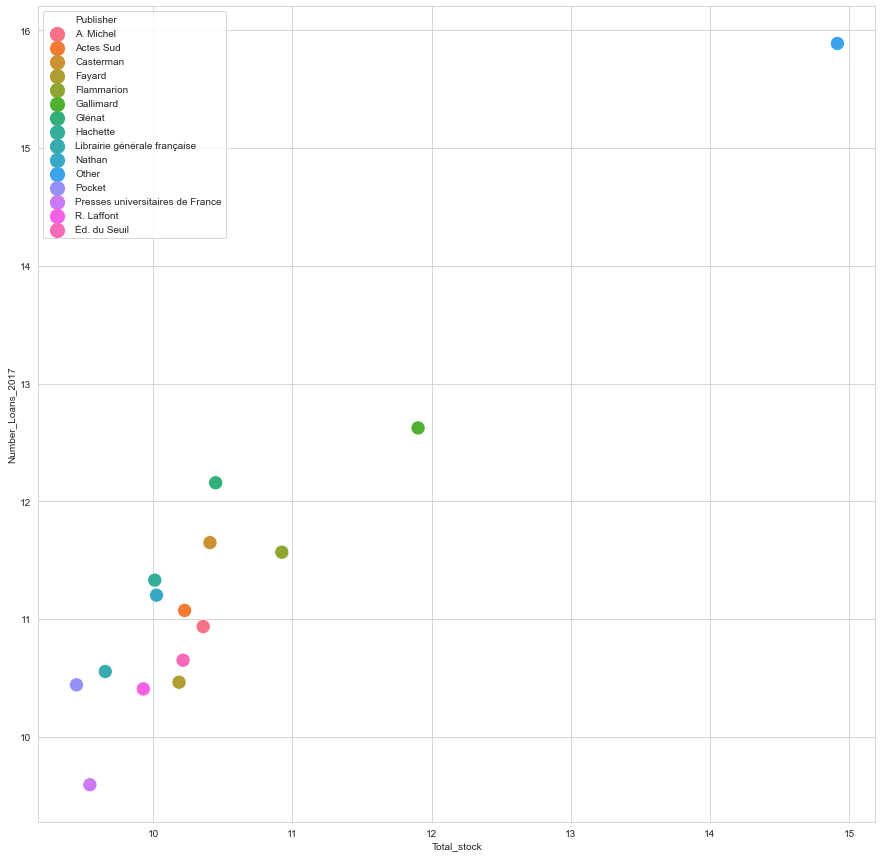

In [58]:
bubblePlot('Publisher','sum','Total_stock','Number_Loans_2017')

In [59]:
#Number of loan per number of document in stock per doc type:
loanrate('Publisher','sum','Total_stock','Number_Loans_2017')

Index(['Total_stock', 'Number_Loans_2017', 'Loan_rate'], dtype='object')


,Total_stock,Number_Loans_2017,Loan_rate
Publisher,,,
Glénat,34526,190508,5.52
Hachette,22294,83312,3.74
Casterman,33150,114579,3.46
Nathan,22572,73320,3.25
Pocket,12706,34230,2.69
Other,3004586,7955597,2.65
Librairie générale française,15622,38331,2.45
Actes Sud,27629,64395,2.33
Gallimard,147790,303600,2.05


#### Number of loans Vs. stock available by Categories_stat

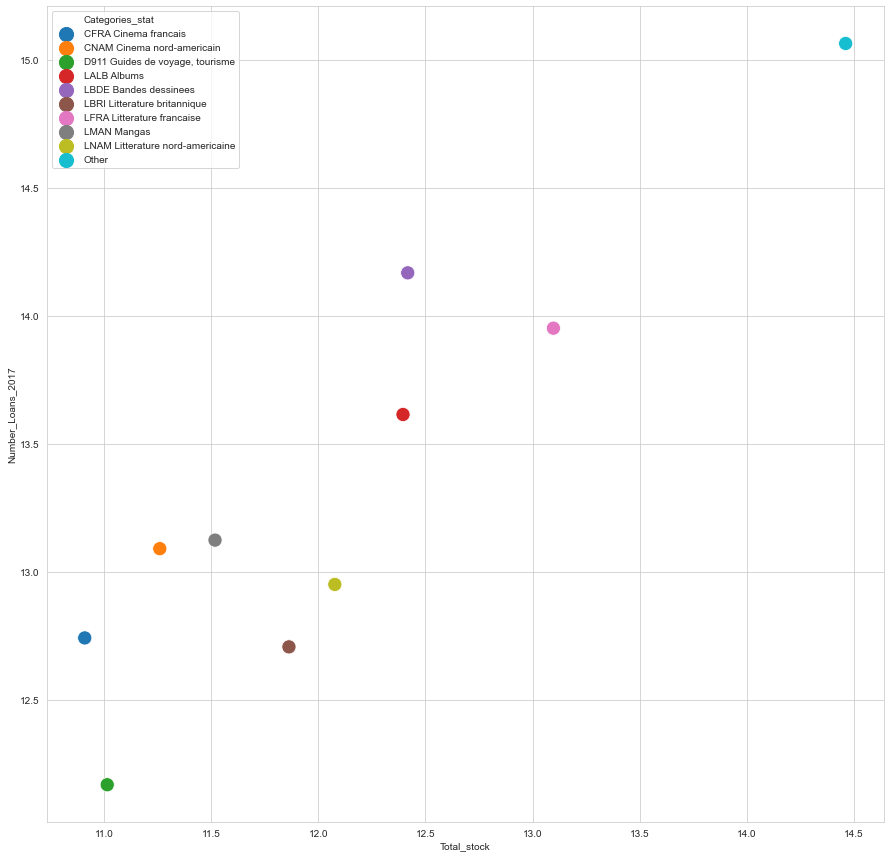

In [60]:
bubblePlot('Categories_stat','sum','Total_stock','Number_Loans_2017')

In [61]:
#Number of loan per number of document in stock per doc type:
loanrate('Categories_stat','sum','Total_stock','Number_Loans_2017')

Index(['Total_stock', 'Number_Loans_2017', 'Loan_rate'], dtype='object')


,Total_stock,Number_Loans_2017,Loan_rate
Categories_stat,,,
CFRA Cinema francais,54671,342119,6.26
CNAM Cinema nord-americain,77617,484745,6.25
LBDE Bandes dessinees,247022,1422852,5.76
LMAN Mangas,100444,501210,4.99
LALB Albums,241629,818477,3.39
"D911 Guides de voyage, tourisme",60717,192865,3.18
LNAM Litterature nord-americaine,175742,421577,2.40
LFRA Litterature francaise,487718,1146486,2.35
LBRI Litterature britannique,141857,330380,2.33


### Various analysis

In [79]:
#Maximum number of loans observed per categories
df.groupby('DocType').agg('max')['Number_Loans_2017']


DocType
BD                     1329
BoardGames               67
Book                   1799
CD                      449
Cannot_be_borrowed       11
DVD                     693
Diapo                     9
Magazine              12745
Map                      16
Other                   181
Partition                80
VHS                       0
Videogames              266
Vynile                    9
Name: Number_Loans_2017, dtype: int64

In [95]:
# Function to get the Title of the document concerned

def getTitle():
    table={}
    dct=df.groupby('DocType').agg('max')['Number_Loans_2017'].to_dict()
    for i in dct.keys():
        line=df[(df.DocType==i)&(df['Number_Loans_2017']==dct[i])]
        table[i]=(line.Title,dct[i])
    return table

In [ ]:
def getTitle(doctype,value):
    dct=df.groupby('DocType').agg('max')['Number_Loans_2017'].to_dict()
    for i in dct.keys():
        line=df[(df.DocType==doctype)&(df['Number_Loans_2017']==value)]
    return line.Title

In [104]:
table=pd.DataFrame(getTitle()).T
table.columns=['Title','Number of loans']
table

,Title,Number of loans
BD,715999 Ben ça alors ! | Texte imprimé | scé...,1329
BoardGames,625765 Dobble | Objet | [jeu et jouet] | De...,67
Book,607932 Max se trouve trop petit | Texte imp...,1799
CD,484478 Comptines pour chanter en anglais | ...,449
Cannot_be_borrowed,239930 Couleurs d'animaux | Texte imprimé 2...,11
DVD,370522 Hugo Cabret | Images animées | Marti...,693
Diapo,718850 Paulina and Fran | Texte imprimé | R...,9
Magazine,"688602 J'aime lire Name: Title, dtype: object",12745
Map,230715 Italie | carte touristique | Institu...,16
Other,263471 Vite et bien 1 | Multimédia multisup...,181


In [69]:
#magazine le plus emprunté
df[(df.DocType=='Magazine')&(df['Number_Loans_2017']==12745.0)]

,Title,Initial_publisher,Number_locations,Total_loans,Number_Loans_2017,Total_stock,Aimé_Césaire,Amélie,André_Malraux,Andrée_Chedid,...,Vaugirard,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
688602,J'aime lire,Bayard-Presse,54,48009.0,12745,2365,52.0,20.0,55.0,36.0,...,36.0,Unknown,Unknown,Unknown,LFRA Litterature francaise,Magazine,1976,41,French,Other


In [85]:
df[(df.Title=="J'aime lire")]

,Title,Initial_publisher,Number_locations,Total_loans,Number_Loans_2017,Total_stock,Aimé_Césaire,Amélie,André_Malraux,Andrée_Chedid,...,Vaugirard,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
688602,J'aime lire,Bayard-Presse,54,48009.0,12745,2365,52.0,20.0,55.0,36.0,...,36.0,Unknown,Unknown,Unknown,LFRA Litterature francaise,Magazine,1976,41,French,Other


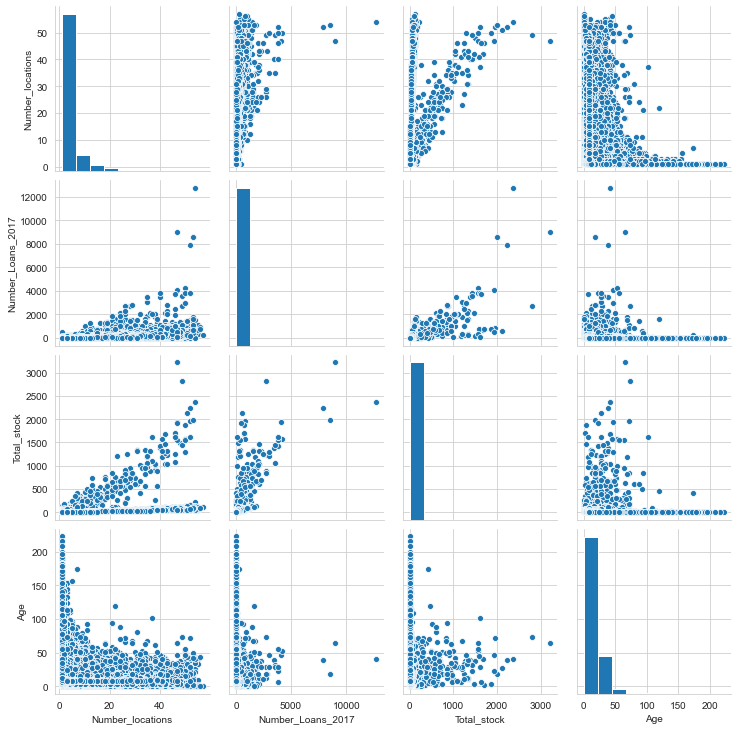

In [142]:
#Looing for relationships between some columns of the dataset.

sns.pairplot(df1.drop(['Title', 'Initial_publisher','Author', 'Author_secondary',
       'Co_Author','New_date','Total_loans'],axis=1))

## Matching Librairies with there arrondissement in Paris

In [ ]:
Arr=pd.read_csv('BibliothequeParis.txt',sep=':')

In [ ]:
Arr.head()

In [ ]:
lib=Arr['librairies'].str.split(',',expand=True)

In [ ]:
lib2=lib.fillna(0)

In [ ]:
lib2

In [ ]:
lib

In [ ]:
lib.iloc[0].count()

In [ ]:
pop=pd.read_csv('pop_arrondissement_paris',sep=',')

In [ ]:
pop['NBlibrairies']=0
for i in range(20):
    pop['NBlibrairies'].iloc[i]=lib.iloc[i].count()
    i+=1

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
plt.barh(pop.arrondissement,pop.population/pop.NBlibrairies)
plt.title('Nb of people per librairies for each arrondissement')
plt.xlabel('Nb people/librairies')
plt.ylabel('N° of arrondissement')

In [ ]:
dflilb=dataBook.iloc[:,38:97]

In [ ]:
dflilb.sum().index

In [ ]:
"""
for i in range(lib2.shape[0]):
    for j in range(lib2.shape[1]):
        if lib2.iloc[i,j]==0:
            lib2.iloc[i,j]=0
        else:
            lib2.iloc[i,j]=dflilb.sum()(lib2.iloc[i,j])"""